<a href="https://colab.research.google.com/github/asim5800/azure/blob/main/Faircent_APP_REVIEWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google_play_scraper import app, Sort, reviews_all

# Top apps for our rivalry

1 12 club (com.twelve.club)

2 Lendenclub investment (com.innofinsolutions.lendenclub.lender)

3 Lendenclub borrower (com.innofinsolutions.instamoney)

4 Faircent (com.app.faircent)

5 Lendbox(in.lendbox.app)

6 Rupeecircle(com.fintelligence.rupeecircle)

7 i2i funding (com.i2ifunding_investorapp)

8 i2i borrower (com.i2iborrower)
 

In [ ]:
# Define and configure Google Play Scraper library
phonepe_users_reviews = reviews_all(
    'com.app.faircent',
    sleep_milliseconds=0,
    #lang='chi', # Default language is 'en', set language to Chinese.
    #country='hk', # Default country is 'us', set country to Hong Kong.
    count=100000, # defaults to 100
    sort=Sort.MOST_RELEVANT, # Default is Sort.MOST_RELEVANT.
)

In [ ]:
# Convert collected reviews data into dataframe
df_reviews = pd.DataFrame(np.array(phonepe_users_reviews),columns=['review'])
df_reviews = df_reviews.join(pd.DataFrame(df_reviews.pop('review').tolist()))
# Display dataframe header
df_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,500f1f19-e70f-41b7-aefa-54d70730a169,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,A decent app with the features almost on par w...,3,61,5.7,2019-01-29 17:39:39,We thank you for taking out time to share your...,2019-01-30 06:47:58,5.7
1,b5d04abd-38fb-406e-999e-9b93d8d8965d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,My experience with the app so far has been goo...,4,99,5.9.5,2019-10-17 14:32:51,"Sir, thanks for feedback. Please update the ap...",2019-10-18 05:00:11,5.9.5
2,f348e2f8-31fb-4ff0-8061-9739d29c1284,Rk gaming,https://play-lh.googleusercontent.com/a-/ACB-R...,Best loan application in the world in my exper...,5,5,5.9.32,2023-03-11 18:35:19,None,NaT,5.9.32
3,3731f56a-a200-4786-b240-e8eabd0f2cc0,chand basha,https://play-lh.googleusercontent.com/a-/ACB-R...,"APPLICATION WAS NOT CLEAR, NOT ASKING ANY DOCU...",1,6,5.9.32,2023-02-14 04:57:05,None,NaT,5.9.32
4,65a0cdc8-739b-485f-af13-5444e66b98ef,MONALI PARIDA,https://play-lh.googleusercontent.com/a-/ACB-R...,I don't know how the hell does this app even w...,1,45,5.9.17,2021-01-26 10:00:27,"HI Ma'am, The fee we take is a one time filing...",2021-01-29 07:01:03,5.9.17


In [ ]:
# Check dataframe information
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3212 entries, 0 to 3211
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              3212 non-null   object        
 1   userName              3212 non-null   object        
 2   userImage             3212 non-null   object        
 3   content               3212 non-null   object        
 4   score                 3212 non-null   int64         
 5   thumbsUpCount         3212 non-null   int64         
 6   reviewCreatedVersion  2122 non-null   object        
 7   at                    3212 non-null   datetime64[ns]
 8   replyContent          2501 non-null   object        
 9   repliedAt             2501 non-null   datetime64[ns]
 10  appVersion            2122 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 276.2+ KB


In [ ]:
#df_reviews.to_csv('12club_review.csv')

In [ ]:
# Count number of review scores
df_reviews['score'].value_counts()

1    1659
5    1223
4     172
3      91
2      67
Name: score, dtype: int64

<Axes: ylabel='score'>

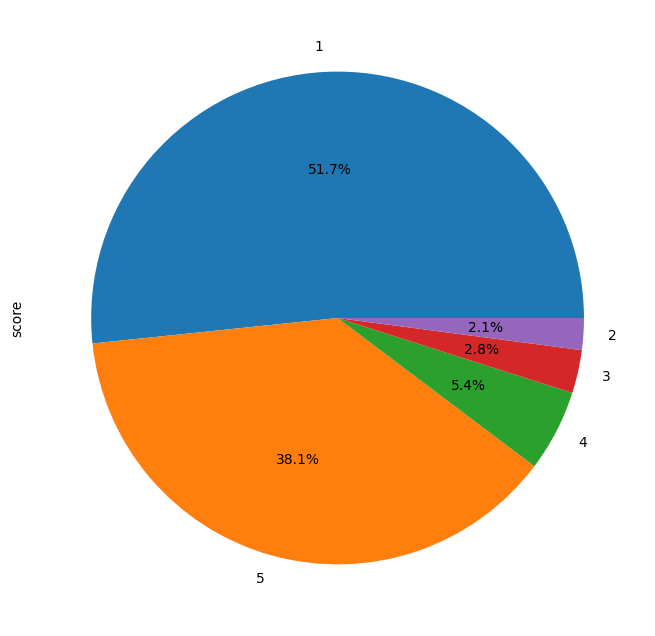

In [ ]:
# Visualize review scores as pie chart  
df_reviews['score'].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.1f%%')

In [ ]:
# Create new dataframe with review content and score for further analysis
df_reviews_content = pd.DataFrame(df_reviews, columns=['content','score'])

In [ ]:
# Display new dataframe header
df_reviews_content.head()

,content,score
0,A decent app with the features almost on par w...,3
1,My experience with the app so far has been goo...,4
2,Best loan application in the world in my exper...,5
3,"APPLICATION WAS NOT CLEAR, NOT ASKING ANY DOCU...",1
4,I don't know how the hell does this app even w...,1


Install azure text analytics API

In [ ]:
pip install azure-ai-textanalytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.9/173.9 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 556.8 kB/s eta 0:00:00


In [ ]:
# Import necessary libraries
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

In [ ]:
# Define the service key and endpoint of Azure Text Analytics
key = "4f40f49470f34ce2b1758902d75c182c"
endpoint = "https://mycognitiveserviceresource12345.cognitiveservices.azure.com/"

In [ ]:
# Configure Azure Text Analytics client library
ta_credential = AzureKeyCredential(key)
text_analytics_client = TextAnalyticsClient(
        endpoint=endpoint, 
        credential=ta_credential)
client = text_analytics_client

reviews_content_sentiment = []

# Pass review content to Azure Text Analytics and collect sentiment result
for index, headers in df_reviews_content.iterrows():
    reviews_content = str(headers['content'])
    print("Review Content: {}".format(reviews_content))
    documents = [reviews_content]
    response = client.analyze_sentiment(documents=documents, language="zh-hant")[0]
    sentiment = response.sentiment
    print("Review Content Sentiment: {}".format(sentiment))
    reviews_score = str(headers['score'])
    print("Review Content Score: {}".format(reviews_score))
    reviews_content_sentiment.append([reviews_content, sentiment, reviews_score])

# Convert collected news headers with sentiment to Pandas dataframes.
reviews_content_sentiment = pd.DataFrame(reviews_content_sentiment, columns=['content','sentiment','reviews_score'])

Streaming output truncated to the last 5000 lines.
Review Content: very Good App
Review Content Sentiment: positive
Review Content Score: 5
Review Content: Worst app dont install it guys
Review Content Sentiment: negative
Review Content Score: 1
Review Content: This is very fraud company When documents uploaded that time all are ok you eligible when you pay register amt 500 then you are not eligible plz plz dont try This company fraud to poor people Fraud fraud fraud
Review Content Sentiment: negative
Review Content Score: 1
Review Content: Very bad experience also customer service, recovery team very badly behaviour with all customers.recovery team call me in lockdown situation and talk with my family "amount pay karna padega nahi to aapke ghar pe aakar hum le lenge" sorry team this is not acceptable..
Review Content Sentiment: negative
Review Content Score: 1
Review Content: EMI ARE DELAYED AND NO ACTION THERE ON
Review Content Sentiment: negative
Review Content Score: 1
Review Conte

In [ ]:
# Count number of review content sentiment
reviews_content_sentiment['sentiment'].value_counts()

positive    1350
negative    1341
neutral      335
mixed        186
Name: sentiment, dtype: int64

<Axes: ylabel='content'>

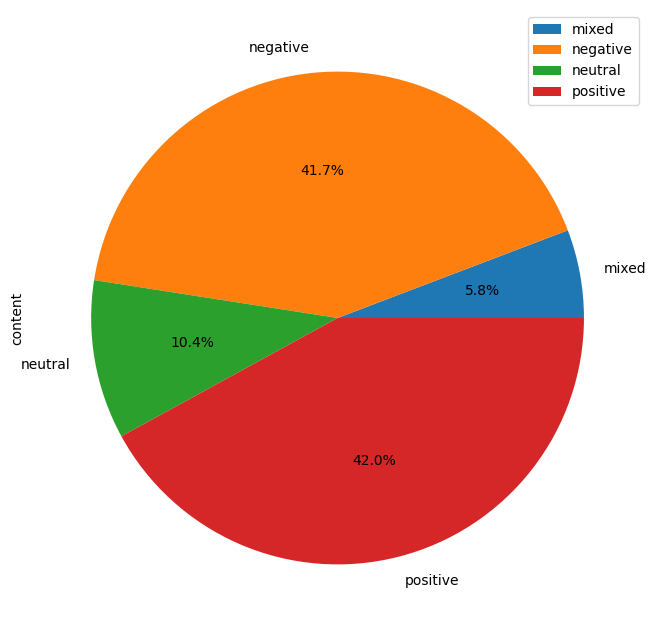

In [ ]:
# Visualize review content sentiment as pie chart.
reviews_content_sentiment.groupby(['sentiment']).count().plot(kind='pie', y='content', figsize=(8,8), autopct='%1.1f%%')

In [ ]:
# Group by sentiment & reviews_score
reviews_content_sentiment.groupby(["sentiment", "reviews_score"])["content"].count()

sentiment  reviews_score
mixed      1                 139
           2                   4
           3                   8
           4                  11
           5                  24
negative   1                1239
           2                  38
           3                  21
           4                  14
           5                  29
neutral    1                 191
           2                  12
           3                  23
           4                  14
           5                  95
positive   1                  90
           2                  13
           3                  39
           4                 133
           5                1075
Name: content, dtype: int64

<Axes: xlabel='sentiment'>

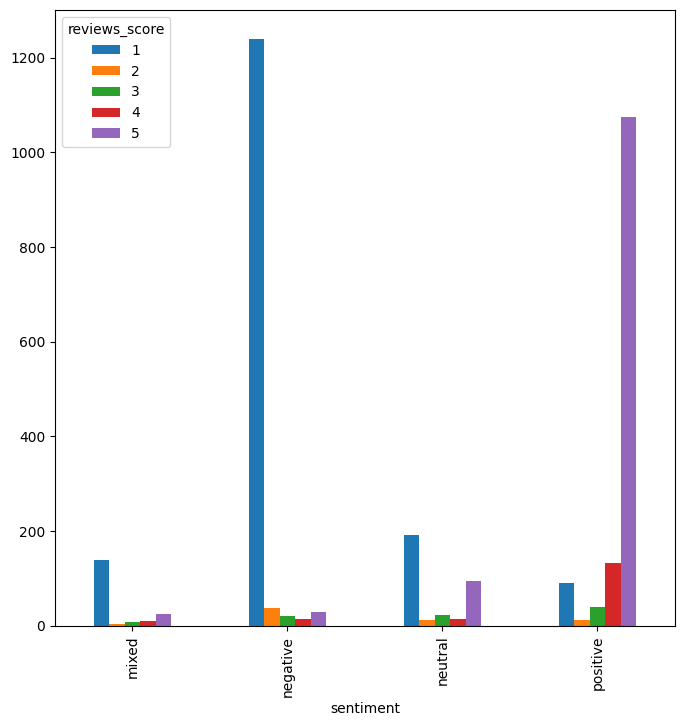

In [ ]:
# Visual sentiment & reviews_score as bar chart
pd.crosstab(reviews_content_sentiment['sentiment'],reviews_content_sentiment['reviews_score']).plot.bar(figsize=(8,8))

In [ ]:
# Check dataframe information
reviews_content_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3212 entries, 0 to 3211
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        3212 non-null   object
 1   sentiment      3212 non-null   object
 2   reviews_score  3212 non-null   object
dtypes: object(3)
memory usage: 75.4+ KB


In [ ]:
reviews_content_sentiment.to_csv('faircent.csv')
reviews_content_sentiment.head()

,content,sentiment,reviews_score
0,A decent app with the features almost on par w...,mixed,3
1,My experience with the app so far has been goo...,mixed,4
2,Best loan application in the world in my exper...,positive,5
3,"APPLICATION WAS NOT CLEAR, NOT ASKING ANY DOCU...",negative,1
4,I don't know how the hell does this app even w...,mixed,1


In [ ]:
# Create new dataframe to perform factorization
reviews_content_sentiment_factorized = reviews_content_sentiment.copy()

In [ ]:
# Perform factorization for sentiment column
reviews_content_sentiment_factorized.sentiment = pd.factorize(reviews_content_sentiment_factorized.sentiment)[0]

In [ ]:
# Convert reviews_score column data type to intager
reviews_content_sentiment_factorized['reviews_score'] = reviews_content_sentiment_factorized['reviews_score'].astype(int)

In [ ]:
# Check dataframe information
reviews_content_sentiment_factorized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3212 entries, 0 to 3211
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        3212 non-null   object
 1   sentiment      3212 non-null   int64 
 2   reviews_score  3212 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 75.4+ KB


In [ ]:
reviews_content_sentiment.to_csv('faircent.csv')
reviews_content_sentiment.head()

,content,sentiment,reviews_score
0,A decent app with the features almost on par w...,mixed,3
1,My experience with the app so far has been goo...,mixed,4
2,Best loan application in the world in my exper...,positive,5
3,"APPLICATION WAS NOT CLEAR, NOT ASKING ANY DOCU...",negative,1
4,I don't know how the hell does this app even w...,mixed,1


In [ ]:
# Group by sentiment (factorized) & reviews_score
reviews_content_sentiment_factorized.groupby(["sentiment", "reviews_score"])["content"].count()

sentiment  reviews_score
0          1                 139
           2                   4
           3                   8
           4                  11
           5                  24
1          1                  90
           2                  13
           3                  39
           4                 133
           5                1075
2          1                1239
           2                  38
           3                  21
           4                  14
           5                  29
3          1                 191
           2                  12
           3                  23
           4                  14
           5                  95
Name: content, dtype: int64

After factorization of sentiment column, below is numberic values the mapping.

0 = Neutral
1 = Negative
2 = Positive
3 = Mixed

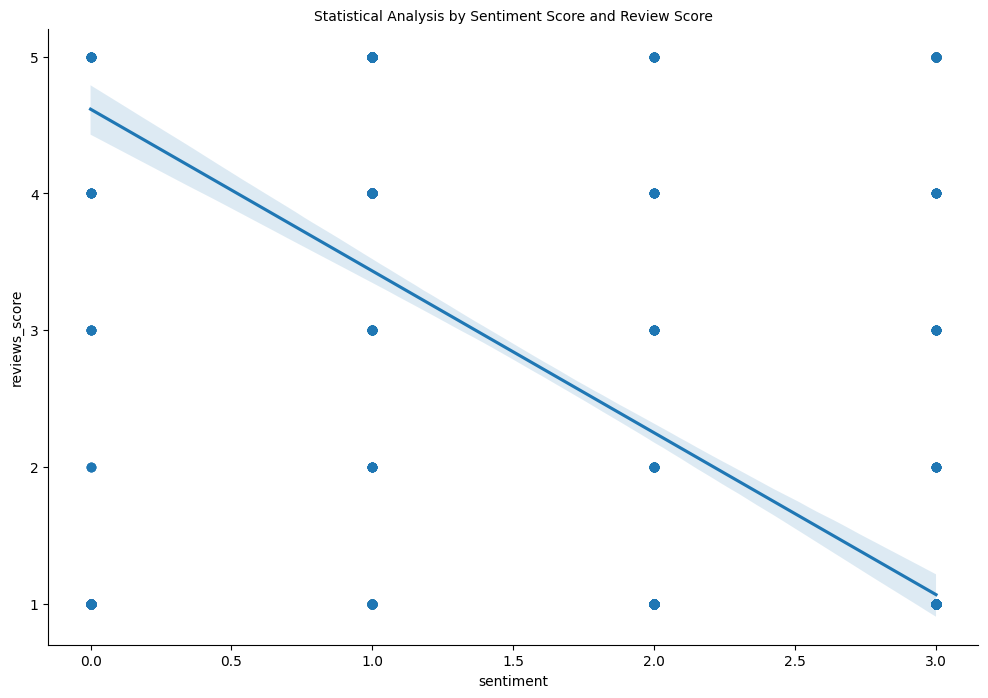

In [ ]:
# Plotting sentiment & reviews_score columns relationship by Seaborn.
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
plt.title('Statistical Analysis by Sentiment Score and Review Score', fontsize=10)
sns.regplot(x='sentiment', y= 'reviews_score', data=reviews_content_sentiment_factorized)
sns.despine()

Data Analysis from Visualization

Positive sentiment (2) from review content is trending to higher reivew score.

Negative sentiment (1) from review content is trending to lower review score.

Neutral sentiment (0) from review content is trending to lower review score.

In other word, lower review score is trending to Neutral sentiment (0).

From this observation, if sentiment is negative to neutral, user would give lower review score.